Librerias y constantes

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import scipy as sci
!apt install ffmpeg

dt=0.01 #si es 0.01 la velocidad de las pelotas serán mucho más lentas
Nsteps=4000
N=16 #numero de pelotas
kHertz=1.0e4
#Constantes del algoritmo de integración
xi =0.1786178958448091
Lambda = -0.2123418310626054
Chi = -0.06626458266981849
Um2labdau2 = (1-2*Lambda)/2
Um2chiplusxi = 1-2*(Chi+xi)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


Clase Cuerpo

In [ ]:
class Cuerpo:
  def __init__(self, x0, y0, Vx0, Vy0, m0, R0):
    self.m=m0
    self.R=R0
    self.r=np.array([x0,y0])
    self.V=np.array([Vx0,Vy0])
    self.F=np.zeros(2)

  def BorreFuerza(self):
    self.F=np.zeros(2)

  def SumeFuerza(self,dF):
    self.F=self.F+dF

  def Mueva_r(self, dt, coeficiente):
    self.r=self.r+(coeficiente*dt)*self.V

  def Mueva_V(self, dt, coeficiente):
    self.V=self.V+(coeficiente*dt)*self.F/self.m

Colisionador

In [ ]:
class Colisionador:

  def __init__(self,N):
    self.N=N

  def CalcularFuerzasEntrePelotas(self,P1,P2):
    self.r21=np.array([0,0])
    self.r21=P2.r-P1.r
    self.d=np.linalg.norm(self.r21)
    self.s=(P1.R+P2.R)-self.d
    if self.s>0:
      self.n=np.array([0,0])
      self.n=self.r21*(1.0/self.d)

      self.F2=np.array([0,0])
      self.F2=self.n*(kHertz*(self.s**1.5))

      P2.SumeFuerza(self.F2)
      P1.SumeFuerza(-self.F2)

  def CalcularTodasLasFuerzas(self,Pelota):
    i=0
    for i in range(N):
      Pelota[i].BorreFuerza()
    i=0
    for i in range(0,N):
      for j in range(0,N):
        if i!=j:
          self.CalcularFuerzasEntrePelotas(Pelota[i], Pelota[j])


Programa principal

In [ ]:

Pelotas=[]
choque=Colisionador(N)

#Generador de pelotas para simulacion de gas

k=0
for k in range(0,N):
  a=np.random.randint(-95,95)*0.1
  b=np.random.randint(-45,45)*0.1
  p=Cuerpo(a,b,0.5,0.5,1.0,0.17)

  Pelotas.append(p)
  print(len(Pelotas))


xdata=np.random.random((N,Nsteps))
ydata=np.random.random((N,Nsteps))

t=0
filas=0
for filas in range(N):
  for t in range(0,Nsteps):
#x=x+xi*dx*v
    for i in range(0,N):
      Pelotas[i].Mueva_r(dt, xi)
#v=v+(1-2*Lambda)*dx*F/2
    choque.CalcularTodasLasFuerzas(Pelotas)
    for i in range(0,N):
      Pelotas[i].Mueva_V(dt, Um2labdau2)
#x=x+Chi*dx*v
    for i in range(0,N):
      Pelotas[i].Mueva_r(dt, Chi)
#v=v+Lambda*dx*F

    choque.CalcularTodasLasFuerzas(Pelotas)
    for i in range(0,N):
      Pelotas[i].Mueva_V(dt, Lambda)
#x=x+(1-2(Chi+xi))*dt*v
    for i in range(0,N):
      Pelotas[i].Mueva_r(dt, Um2chiplusxi)
#v=v+Lambda*dx*F
    choque.CalcularTodasLasFuerzas(Pelotas)
    for i in range(0,N):
      Pelotas[i].Mueva_V(dt, Lambda)
#x=x+Chi*dx*v
    for i in range(0,N):
      Pelotas[i].Mueva_r(dt, Chi)
#v=v+(1-2*Lambda)*dx*F/2
    choque.CalcularTodasLasFuerzas(Pelotas)
    for i in range(0,N):
      Pelotas[i].Mueva_V(dt, Um2labdau2)
#x=x+xi*dx*v
    for i in range(0,N):
      Pelotas[i].Mueva_r(dt, xi)

#Para guardar los datos y su animacion junto con el choque con las paredes, creo que si funciona bien

    xdata[filas,t]=Pelotas[0].r[0]
    ydata[filas,t]=Pelotas[0].r[1]

    for i in range(0,N):
      if Pelotas[i].r[0]<=-10 or Pelotas[i].r[0]>=10:
        Pelotas[i].V[0]=-Pelotas[i].V[0]
      if Pelotas[i].r[1]<=-5 or Pelotas[i].r[1]>=5:
        Pelotas[i].V[1]=-Pelotas[i].V[1]



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
[[-2.295      -2.29       -2.285      ... -6.89289954 -6.8985148
  -6.90413005]
 [-6.9097453  -6.91536056 -6.92097581 ...  7.22020983  7.21609444
   7.21197904]
 [ 7.20786365  7.20374826  7.19963286 ...  6.15925933  6.16601133
   6.17276334]
 ...
 [-3.9538865  -3.9613074  -3.9687283  ...  1.55167172  1.54257044
   1.53346917]
 [ 1.52436789  1.51526662  1.50616535 ...  5.10743065  5.1110803
   5.11472995]
 [ 5.1183796   5.12202925  5.1256789  ...  0.29719113  0.29354148
   0.28989183]]
[[-3.395      -3.39       -3.385      ...  2.17408369  2.17329688
   2.17251007]
 [ 2.17172326  2.17093645  2.17014964 ...  0.28086899  0.2861005
   0.291332  ]
 [ 0.29656351  0.30179501  0.30702652 ... -2.72631137 -2.72391359
  -2.7215158 ]
 ...
 [-1.68855245 -1.68340099 -1.67824953 ... -3.31843241 -3.31404534
  -3.30965827]
 [-3.3052712  -3.30088414 -3.29649707 ...  2.50601354  2.50383637
   2.50165921]
 [ 2.49948204  2.49730487  2.4951277  ... -3.79906314 -3.79688

Animar y graficar


<ipython-input-5-06f9143435bd>:31: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lines[ln].set_data(x, y)
<ipython-input-5-06f9143435bd>:31: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lines[ln].set_data(x, y)


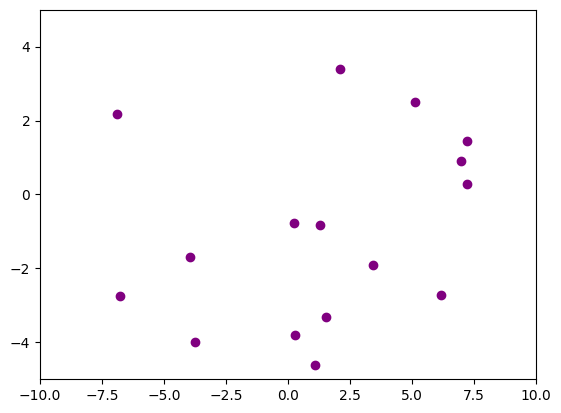

In [ ]:
# initializing a figure in
# which the graph will be plotted
fig = plt.figure()
# marking the x-axis and y-axis
axis = plt.axes(xlim =(-10, 10), ylim =(-5, 5))
"""
c=0
for c in range(N):

lines, = axis.plot((([], [])[0] for _ in range(0,N)),color= 'purple',marker='o', linestyle='dashed',linewidth=2)
"""
lines=[]

for ln in range(ydata.shape[0]):
  line, = axis.plot(xdata[ln,:], ydata[ln,:],color= 'purple',marker='o', linestyle='dashed',linewidth=2)
  lines.append(line,)




def init():
  lines.set_data([], [])
  return lines

i=0
def animate(i):
  ln=0
  for ln in range(ydata.shape[0]):
    x=xdata[ln,i]
    y=ydata[ln,i]
    lines[ln].set_data(x, y)

  return (lines)

"""
def animate(i):
  fl=0
  for fl in range(N):
    x=xdata[fl,i]
    y=ydata[fl,i]
    lines.set_data(x, y)
  return (lines,)
"""
#plt.plot(xdata, ydata,'b',x2data, y2data, 'r')
#plt.show

anim=animation.FuncAnimation(fig, animate, init_func=None, frames=Nsteps, interval=20, blit=True)
anim.save('prueba de creador de pelotas(PEFRL) .mp4', fps=30)
